## House Prices

* 주택 구매자에게 자신이 꿈꾸는 주택에 대해 설명하도록 요청하면 지하실 천장의 높이나 동서 철도와의 근접성으로 시작하지 않을 것입니다.
* 그러나 이 데이터 세트는 (그러한 특성이) 침실의 수나 흰색 울타리보다 가격 협상에 훨씬 더 많은 영향을 미친다는 것을 증명합니다.
* 아이오와주 에임스에 있는 주거용 주택의 (거의) 모든 측면을 설명하는 79개의 설명 변수가 있는 이 경쟁은 각 주택의 최종 가격을 예측하는 데 도전합니다.

<img src="https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png"/>

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

## 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

## 데이터 로드

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
# train
train = pd.read_csv("data/house-prices/train.csv", index_col="Id")
print(train.shape)
train.head(2)

(1460, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [4]:
# test
test = pd.read_csv("data/house-prices/test.csv", index_col="Id")
print(test.shape)
test.head(2)

(1459, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


In [5]:
# sub
sub = pd.read_csv("data/house-prices/sample_submission.csv")
print(sub.shape)
sub.head(2)

(1459, 2)


,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989


In [6]:
set(train.columns.tolist()) - set(test.columns.tolist())

{'SalePrice'}

## 데이터 탐색

In [7]:
# info
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## 기술통계

In [8]:
train.describe().style.background_gradient()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [79]:
train.describe(include="object")

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


## histplot

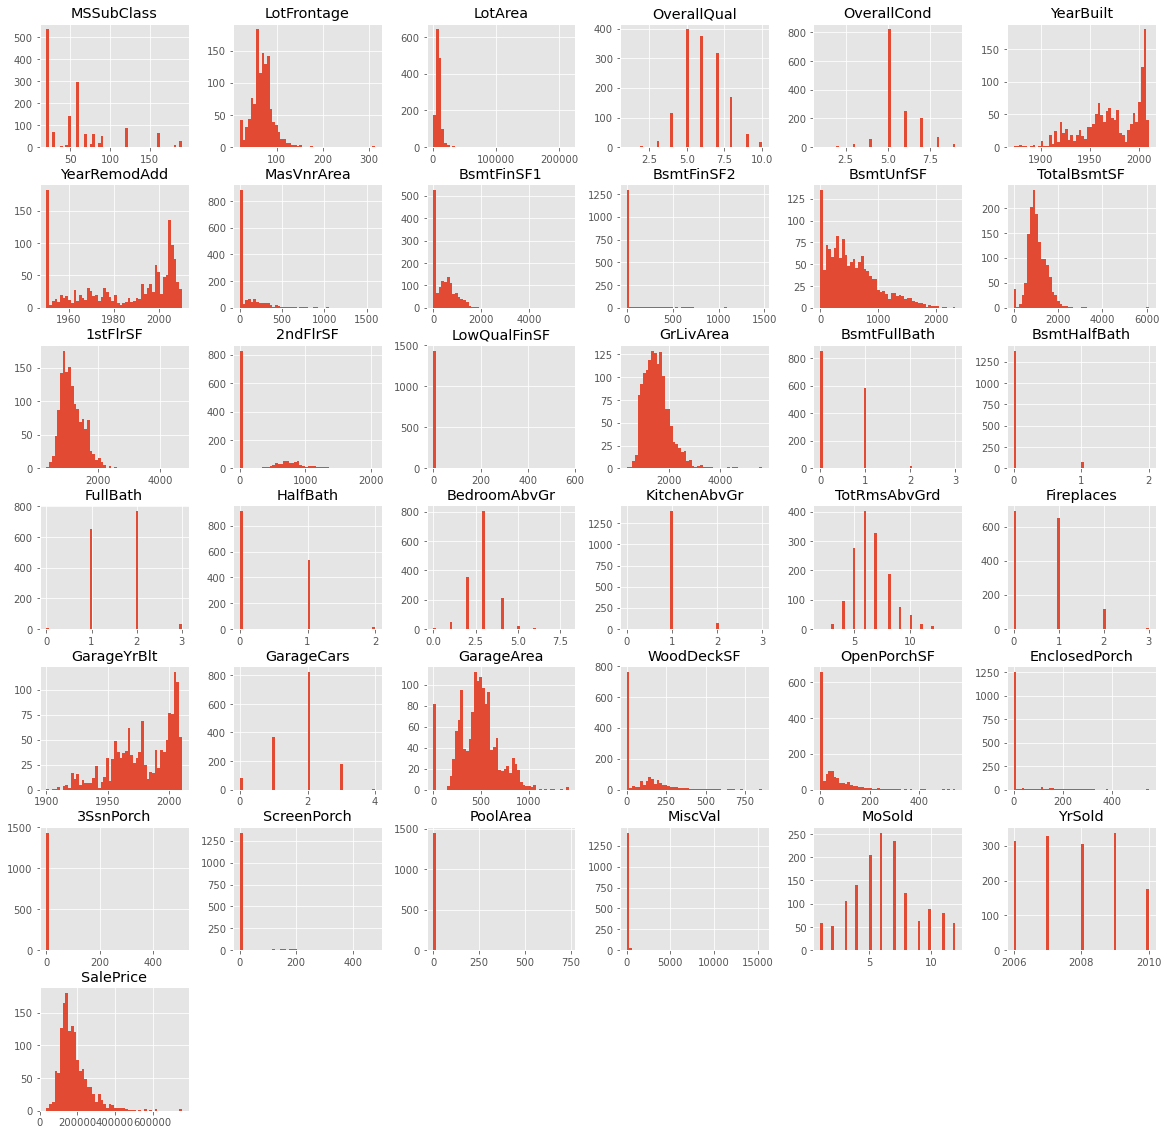

In [10]:
_ = train.hist(figsize=(20, 20), bins=50)

## 결측치 탐색

In [80]:
train.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage    259
LotArea          0
Street           0
              ... 
C (all)          1
FV               1
RH               1
RL               1
RM               1
Length: 94, dtype: int64

In [81]:
train.isnull().mean()

MSSubClass    0.00
MSZoning      0.00
LotFrontage   0.18
LotArea       0.00
Street        0.00
              ... 
C (all)       0.00
FV            0.00
RH            0.00
RL            0.00
RM            0.00
Length: 94, dtype: float64

In [11]:
pd.concat([train.isnull().sum(), train.isnull().mean() * 100], axis=1).T

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.0,0.0,259.000000,0.0,0.0,1369.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.000000,8.000000,0.0,0.0,0.0,37.000000,37.000000,38.00000,37.000000,0.0,38.00000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,690.000000,81.000000,81.000000,81.000000,0.0,0.0,81.000000,81.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1453.000000,1179.000000,1406.00000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,17.739726,0.0,0.0,93.767123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.547945,0.547945,0.0,0.0,0.0,2.534247,2.534247,2.60274,2.534247,0.0,2.60274,0.0,0.0,0.0,0.0,0.0,0.0,0.068493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.260274,5.547945,5.547945,5.547945,0.0,0.0,5.547945,5.547945,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.520548,80.753425,96.30137,0.0,0.0,0.0,0.0,0.0,0.0


## 이상치 탐색

In [12]:
# SalePrice
train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

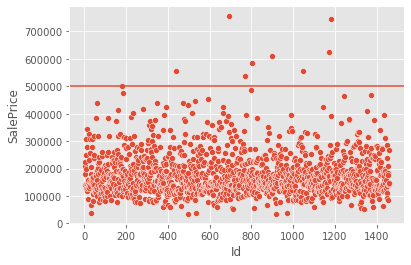

In [13]:
sns.scatterplot(data=train, x=train.index, y="SalePrice")
plt.axhline(500000)

## 희소값 탐색

In [83]:
# object type nunique
train.select_dtypes(include="object").nunique()

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

In [15]:
# Neighborhood - value_counts
train["Neighborhood"].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Neighborhood'>

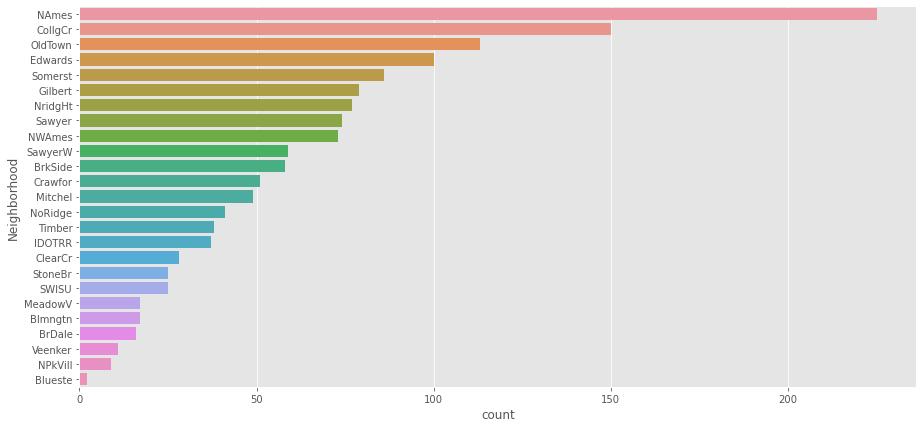

In [16]:
# countplot
plt.figure(figsize=(15, 7))
sns.countplot(data=train, y="Neighborhood", 
              order=train["Neighborhood"].value_counts().index)

## 변수 스케일링과 트랜스포메이션


* Standard Scaler는 평균이 0, 표준편차가 1입니다.
    * Z-score scaling
    * z = (X - X.mean) / std

* MinMax Scaler는 최소값이 0, 최대값이 1입니다.
    * X_scaled = (X - X.min) / (X.max - X.min)

* Robust Scaler는 IQR을 기준으로 scaling 하기 때문에 Standard Scaler보다 더 큰 최소값, 더 작은 최대값을 갖게 됩니다.
    * X_scaled = (X - X.median) / IQR

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

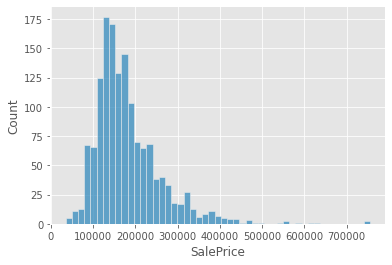

In [17]:
# SalePrice
sns.histplot(data=train, x="SalePrice")

In [18]:
# StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [19]:
# StandardScaler
# fit, fit_transform, transform
#  z = (x - u) / s
ss = StandardScaler()
ss

StandardScaler()

In [20]:
# 같은 기준으로 transform 해주기 위해서는 train 에만 fit을 해주거나
# train, test 를 합친 후에 fit 을 해줍니다.
ss.fit(train[["SalePrice"]]).transform(train[["SalePrice"]])

array([[ 0.34727322],
       [ 0.00728832],
       [ 0.53615372],
       ...,
       [ 1.07761115],
       [-0.48852299],
       [-0.42084081]])

In [21]:
# fit -> transform == fit_transform ==> train 에만
# transform -> train, test 둘 다
train[['SalePrice_ss']] = ss.fit_transform(train[["SalePrice"]])
train[['SalePrice_ss']].head()

,SalePrice_ss
Id,
1,0.347273
2,0.007288
3,0.536154
4,-0.515281
5,0.869843


In [22]:
ss.fit_transform(train[["LotArea"]])
ss.transform(test[['LotArea']])

array([[ 0.11076257],
       [ 0.37584985],
       [ 0.33205282],
       ...,
       [ 0.95042275],
       [-0.00759964],
       [-0.08918038]])

In [23]:
# MinMaxScaler
mm = MinMaxScaler()
train[['SalePrice_mm']] = mm.fit_transform(train[['SalePrice']])
train[['SalePrice_mm']].head(2)

,SalePrice_mm
Id,
1,0.241078
2,0.203583


In [24]:
# RobustScaler
rs = RobustScaler()
train[['SalePrice_rs']] = rs.fit_transform(train[['SalePrice']])
train[['SalePrice_rs']].head(2)

,SalePrice_rs
Id,
1,0.541506
2,0.220173


In [25]:
saleprice_iqr = train["SalePrice"].quantile(0.75) - train["SalePrice"].quantile(0.25)
saleprice_iqr

84025.0

In [26]:
(train["SalePrice"] - train["SalePrice"].median())  / saleprice_iqr

Id
1       0.541506
2       0.220173
3       0.720024
4      -0.273728
5       1.035406
          ...   
1456    0.142815
1457    0.559357
1458    1.231776
1459   -0.248438
1460   -0.184469
Name: SalePrice, Length: 1460, dtype: float64

In [27]:
train[["SalePrice", "SalePrice_ss", "SalePrice_mm", "SalePrice_rs"]]

,SalePrice,SalePrice_ss,SalePrice_mm,SalePrice_rs
Id,,,,
1,208500,0.347273,0.241078,0.541506
2,181500,0.007288,0.203583,0.220173
3,223500,0.536154,0.261908,0.720024
4,140000,-0.515281,0.145952,-0.273728
5,250000,0.869843,0.298709,1.035406
...,...,...,...,...
1456,175000,-0.074560,0.194556,0.142815
1457,210000,0.366161,0.243161,0.559357
1458,266500,1.077611,0.321622,1.231776


In [28]:
pd.options.display.float_format = '{:,.2f}'.format

In [29]:
# describe - "SalePrice", "SalePrice_ss", "SalePrice_mm", "SalePrice_rs"
train[["SalePrice", "SalePrice_ss", "SalePrice_mm", "SalePrice_rs"]].describe()

,SalePrice,SalePrice_ss,SalePrice_mm,SalePrice_rs
count,"1,460.00","1,460.00","1,460.00","1,460.00"
mean,"180,921.20",0.00,0.20,0.21
std,"79,442.50",1.00,0.11,0.95
min,"34,900.00",-1.84,0.00,-1.52
25%,"129,975.00",-0.64,0.13,-0.39
50%,"163,000.00",-0.23,0.18,0.00
75%,"214,000.00",0.42,0.25,0.61
max,"755,000.00",7.23,1.00,7.05


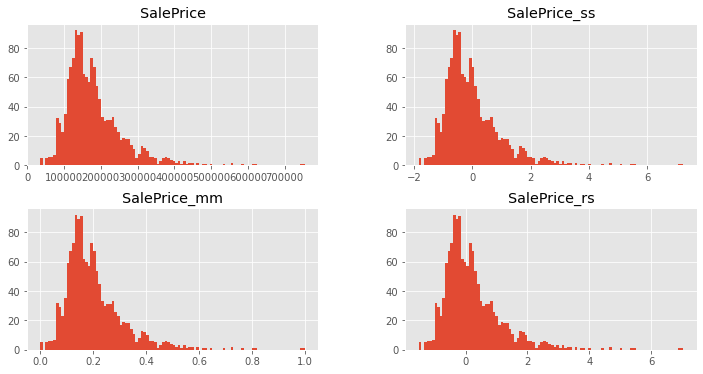

In [30]:
# histplot - "SalePrice", "SalePrice_ss", "SalePrice_mm", "SalePrice_rs"
train[["SalePrice", "SalePrice_ss", "SalePrice_mm", "SalePrice_rs"]].hist(figsize = (12, 6), bins = 100)
plt.show()

In [31]:
# log1p - SalePrice, SalePrice_ss
train['SalePrice_log1p'] = np.log1p(train['SalePrice'])
train['SalePrice_log1p']

Id
1      12.25
2      12.11
3      12.32
4      11.85
5      12.43
        ... 
1456   12.07
1457   12.25
1458   12.49
1459   11.86
1460   11.90
Name: SalePrice_log1p, Length: 1460, dtype: float64

In [32]:
# ss = StandardScaler()
train['SalePrice_ss_log1p'] = np.log1p(train['SalePrice_ss'])
train['SalePrice_ss_log1p']

/Users/imyeongjin/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Id
1       0.30
2       0.01
3       0.43
4      -0.72
5       0.63
        ... 
1456   -0.08
1457    0.31
1458    0.73
1459   -0.67
1460   -0.55
Name: SalePrice_ss_log1p, Length: 1460, dtype: float64

In [33]:
train['SalePrice_log1p_ss'] = ss.fit_transform(train[['SalePrice_log1p']])
train['SalePrice_log1p_ss']

Id
1       0.56
2       0.21
3       0.73
4      -0.44
5       1.01
        ... 
1456    0.12
1457    0.58
1458    1.17
1459   -0.40
1460   -0.31
Name: SalePrice_log1p_ss, Length: 1460, dtype: float64

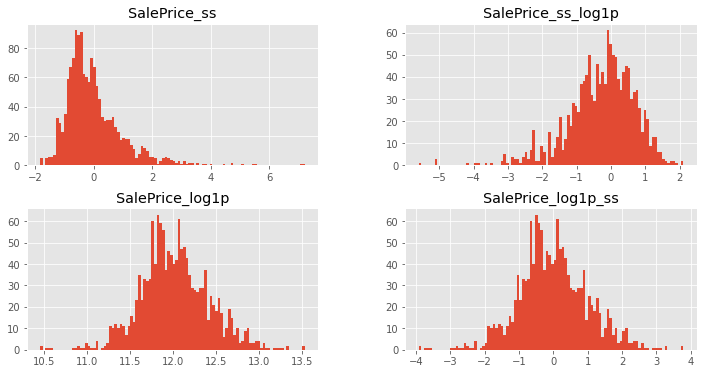

In [34]:
# histplot - SalePrice_ss, SalePrice_ss_log1p, SalePrice_log1p

train[["SalePrice_ss", 'SalePrice_ss_log1p', 'SalePrice_log1p', 'SalePrice_log1p_ss']].hist(figsize = (12, 6), bins = 100)
plt.show()

## 지수함수, 로그함수 이해

<AxesSubplot:>

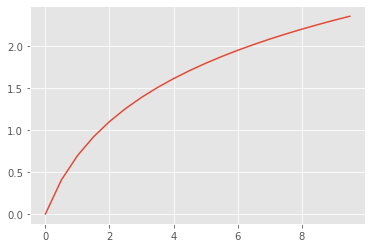

In [35]:
x = np.arange(0,10,0.5)
sns.lineplot(x=x, y=np.log(x + 1))

In [36]:
np.log(-1)

/var/folders/zy/jb12z_p158z9d8lp7qtwwzgw0000gn/T/ipykernel_5665/153577755.py:1: RuntimeWarning: invalid value encountered in log
  np.log(-1)


nan

<AxesSubplot:>

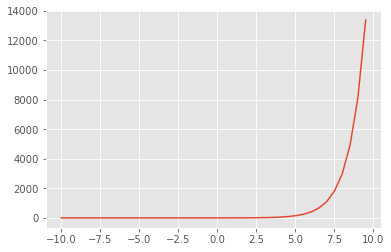

In [37]:
x = np.arange(-10, 10, 0.5)
sns.lineplot(x=x, y=np.exp(x))

## 이산화

In [38]:
list(range(1, 5))

[1, 2, 3, 4]

In [39]:
# SalePrice - cut, qcut
train['SalePrice_cut'] = pd.cut(train['SalePrice'], bins = 4, labels= list(range(1, 5)))
train['SalePrice_cut'] # 절대평가

Id
1       1
2       1
3       2
4       1
5       2
       ..
1456    1
1457    1
1458    2
1459    1
1460    1
Name: SalePrice_cut, Length: 1460, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [40]:
train['SalePrice_qcut'] = pd.qcut(train['SalePrice'], 4,  labels=list(range(1, 5)))
train['SalePrice_qcut'] #상대평가

Id
1       3
2       3
3       4
4       2
5       4
       ..
1456    3
1457    3
1458    4
1459    2
1460    2
Name: SalePrice_qcut, Length: 1460, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [41]:
# "SalePrice_cut", "SalePrice_qcut" - value_counts
train['SalePrice_cut'].value_counts()

1    1100
2     330
3      25
4       5
Name: SalePrice_cut, dtype: int64

In [42]:
train['SalePrice_qcut'].value_counts()

2    367
3    366
1    365
4    362
Name: SalePrice_qcut, dtype: int64

/Users/imyeongjin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice_cut', ylabel='count'>

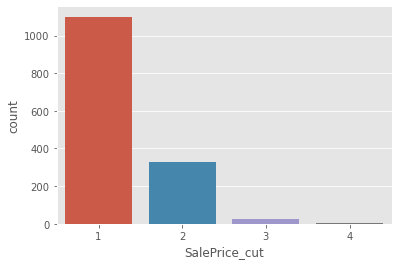

In [43]:
# "SalePrice_cut", "SalePrice_qcut" - countplot
sns.countplot(train['SalePrice_cut'])

/Users/imyeongjin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice_qcut', ylabel='count'>

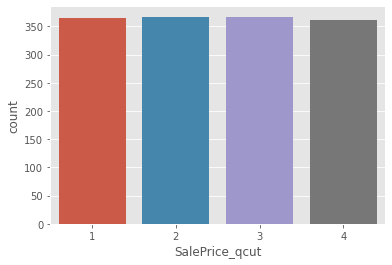

In [44]:
sns.countplot(train['SalePrice_qcut'])

<AxesSubplot:xlabel='SalePrice_qcut', ylabel='count'>

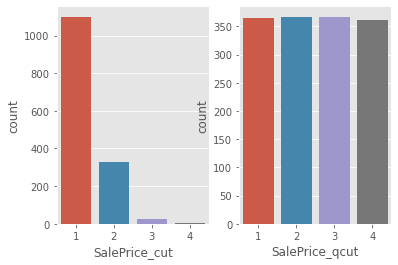

In [45]:
fig, axes = plt.subplots(1, 2)
sns.countplot(data = train, x = "SalePrice_cut", ax = axes[0])
sns.countplot(data = train, x = "SalePrice_qcut", ax = axes[1])

## 인코딩
### pandas를 이용한 인코딩

In [46]:
# MSZoning - value_counts
train['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [47]:
# MSZoning - .cat.codes --> ordinal encoding
train['MSZoning'].astype('category').cat.codes

Id
1       3
2       3
3       3
4       3
5       3
       ..
1456    3
1457    3
1458    3
1459    3
1460    3
Length: 1460, dtype: int8

In [48]:
# get_dummies
pd.get_dummies(train['MSZoning'])

,C (all),FV,RH,RL,RM
Id,,,,,
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
5,0,0,0,1,0
...,...,...,...,...,...
1456,0,0,0,1,0
1457,0,0,0,1,0
1458,0,0,0,1,0


### sklearn을 이용한 인코딩

In [49]:
# preprocessing - OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [50]:
# MSZoning_oe
oe = OrdinalEncoder()
train[['MSZoning_oe']] = oe.fit(train[['MSZoning']]).transform(train[['MSZoning']])
train[['MSZoning_oe']].head()

,MSZoning_oe
Id,
1,3.00
2,3.00
3,3.00
4,3.00
5,3.00


In [51]:
# MSZoning_ohe
ohe = OneHotEncoder()
MSZoning_ohe = ohe.fit(train[["MSZoning"]]).transform(train[["MSZoning"]])
MSZoning_ohe.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])

In [52]:
oe.categories_[0].tolist()

['C (all)', 'FV', 'RH', 'RL', 'RM']

In [53]:
train[ohe.categories_[0]] = pd.DataFrame(MSZoning_ohe.toarray(), columns=ohe.categories_[0])
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_ss,SalePrice_mm,SalePrice_rs,SalePrice_log1p,SalePrice_ss_log1p,SalePrice_log1p_ss,SalePrice_cut,SalePrice_qcut,MSZoning_oe,C (all),FV,RH,RL,RM
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,"2,003.00",RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,0.35,0.24,0.54,12.25,0.30,0.56,1,3,3.00,0.00,0.00,0.00,1.00,0.00
2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,"1,976.00",RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,0.01,0.20,0.22,12.11,0.01,0.21,1,3,3.00,0.00,0.00,0.00,1.00,0.00
3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,"2,001.00",RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,0.54,0.26,0.72,12.32,0.43,0.73,2,4,3.00,0.00,0.00,0.00,1.00,0.00
4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,"1,998.00",Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,-0.52,0.15,-0.27,11.85,-0.72,-0.44,1,2,3.00,0.00,0.00,0.00,1.00,0.00
5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,"2,000.00",RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,0.87,0.30,1.04,12.43,0.63,1.01,2,4,3.00,0.00,0.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.00,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.00,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,"1,999.00",RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,-0.07,0.19,0.14,12.07,-0.08,0.12,1,3,3.00,0.00,0.00,0.00,1.00,0.00
1457,20,RL,85.00,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.00,

In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 94 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   MSSubClass          1460 non-null   int64   
 1   MSZoning            1460 non-null   object  
 2   LotFrontage         1201 non-null   float64 
 3   LotArea             1460 non-null   int64   
 4   Street              1460 non-null   object  
 5   Alley               91 non-null     object  
 6   LotShape            1460 non-null   object  
 7   LandContour         1460 non-null   object  
 8   Utilities           1460 non-null   object  
 9   LotConfig           1460 non-null   object  
 10  LandSlope           1460 non-null   object  
 11  Neighborhood        1460 non-null   object  
 12  Condition1          1460 non-null   object  
 13  Condition2          1460 non-null   object  
 14  BldgType            1460 non-null   object  
 15  HouseStyle          1460 non-null   ob

## 파생변수

In [55]:
# number - info
train.select_dtypes(include='number').info() #수치형만 뽑기

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MSSubClass          1460 non-null   int64  
 1   LotFrontage         1201 non-null   float64
 2   LotArea             1460 non-null   int64  
 3   OverallQual         1460 non-null   int64  
 4   OverallCond         1460 non-null   int64  
 5   YearBuilt           1460 non-null   int64  
 6   YearRemodAdd        1460 non-null   int64  
 7   MasVnrArea          1452 non-null   float64
 8   BsmtFinSF1          1460 non-null   int64  
 9   BsmtFinSF2          1460 non-null   int64  
 10  BsmtUnfSF           1460 non-null   int64  
 11  TotalBsmtSF         1460 non-null   int64  
 12  1stFlrSF            1460 non-null   int64  
 13  2ndFlrSF            1460 non-null   int64  
 14  LowQualFinSF        1460 non-null   int64  
 15  GrLivArea           1460 non-null   int64  
 16  BsmtFu

### 다항식 전개(Polynomial Expansion)
* 다항식 전개(Polynomial Expansion)에 기반한 파생변수 생성 방법에 대해서 알아보겠습니다.
주어진 다항식의 차수 값에 기반하여 파생변수를 생성할 수 있습니다.
예를 들어 [a, b]가 Feature로 주어질 때 다항식의 최대 차수를 2로 지정했다고 하겠습니다.
* 이 경우 새로 생성될 수 있는 Polynomial Feature는 [1, a, b, a^2, ab, b^2]입니다.
* 이러한 파생변수 생성이 왜 유용할까요?
    * 데이터를 분석할 때 다항식 전개에 기반한 파생변수 생성 방법은 다소 유용하지 않을 수 있습니다.
    * 다항식 전개에 기반한 변수보다 원래 변수를 보는 게 더 직관적이고 이해하기 쉽기 때문입니다.
    * 그러나 머신러닝 모델을 이용할 때 이것이 유용할 수 있습니다.
    왜 그럴까요?
    * 머신러닝 모델은 label에 대해서 설명력이 높은 한 두가지 Feature에 의지할 때보다 여러가지 Feature에 기반할 때 성능이 더 뛰어나기 때문입니다.
    * 소수의 Feature에 기반하게 되면 과대적합이 일어날 확률이 높아집니다.
    * 다항식 전개에 기반해서 파생변수를 만들게 되면 머신러닝 모델이 여러  Feature에 기반하게 되어 안정성이 높아집니다.
* 그럼 꼭 다항식 전개일 필요는 없지 않나요?
    * 다항식 전개 외에도 다른 방법으로도 파생변수를 만들 수 있습니다.
    * 다만 다항식 전개로 파생변수를 만드는 방식은 매커니즘이 직관적이고 sklearn 라이브러리에서 관련 기능을 지원하고 있어 편리합니다.


In [56]:
# preprocessing - PolynomialFeatures

from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2, include_bias=False)
pf_val = pf.fit_transform(train[['MSSubClass', 'LotArea']])
pd.DataFrame(pf_val, columns = pf.get_feature_names_out())

,MSSubClass,LotArea,MSSubClass^2,MSSubClass LotArea,LotArea^2
0,60.00,"8,450.00","3,600.00","507,000.00","71,402,500.00"
1,20.00,"9,600.00",400.00,"192,000.00","92,160,000.00"
2,60.00,"11,250.00","3,600.00","675,000.00","126,562,500.00"
3,70.00,"9,550.00","4,900.00","668,500.00","91,202,500.00"
4,60.00,"14,260.00","3,600.00","855,600.00","203,347,600.00"
...,...,...,...,...,...
1455,60.00,"7,917.00","3,600.00","475,020.00","62,678,889.00"
1456,20.00,"13,175.00",400.00,"263,500.00","173,580,625.00"
1457,70.00,"9,042.00","4,900.00","632,940.00","81,757,764.00"
1458,20.00,"9,717.00",400.00,"194,340.00","94,420,089.00"


## 특성 선택
### 분산 기반 필터링

In [57]:
for col in train.select_dtypes(include='object').columns:
    print(train[col].value_counts(normalize=True))

RL        0.79
RM        0.15
FV        0.04
RH        0.01
C (all)   0.01
Name: MSZoning, dtype: float64
Pave   1.00
Grvl   0.00
Name: Street, dtype: float64
Grvl   0.55
Pave   0.45
Name: Alley, dtype: float64
Reg   0.63
IR1   0.33
IR2   0.03
IR3   0.01
Name: LotShape, dtype: float64
Lvl   0.90
Bnk   0.04
HLS   0.03
Low   0.02
Name: LandContour, dtype: float64
AllPub   1.00
NoSeWa   0.00
Name: Utilities, dtype: float64
Inside    0.72
Corner    0.18
CulDSac   0.06
FR2       0.03
FR3       0.00
Name: LotConfig, dtype: float64
Gtl   0.95
Mod   0.04
Sev   0.01
Name: LandSlope, dtype: float64
NAmes     0.15
CollgCr   0.10
OldTown   0.08
Edwards   0.07
Somerst   0.06
Gilbert   0.05
NridgHt   0.05
Sawyer    0.05
NWAmes    0.05
SawyerW   0.04
BrkSide   0.04
Crawfor   0.03
Mitchel   0.03
NoRidge   0.03
Timber    0.03
IDOTRR    0.03
ClearCr   0.02
StoneBr   0.02
SWISU     0.02
MeadowV   0.01
Blmngtn   0.01
BrDale    0.01
Veenker   0.01
NPkVill   0.01
Blueste   0.00
Name: Neighborhood, dtype: fl

In [58]:
# RoofMatl - value_counts
train['RoofMatl'].value_counts(normalize = True)

CompShg   0.98
Tar&Grv   0.01
WdShngl   0.00
WdShake   0.00
Metal     0.00
Membran   0.00
Roll      0.00
ClyTile   0.00
Name: RoofMatl, dtype: float64

In [59]:
# RoofMatl - countplot
train

### 상관관계 기반 필터링

In [68]:
# corr
corr = train.corr()
mask = np.triu(np.ones_like(corr))

<AxesSubplot:>

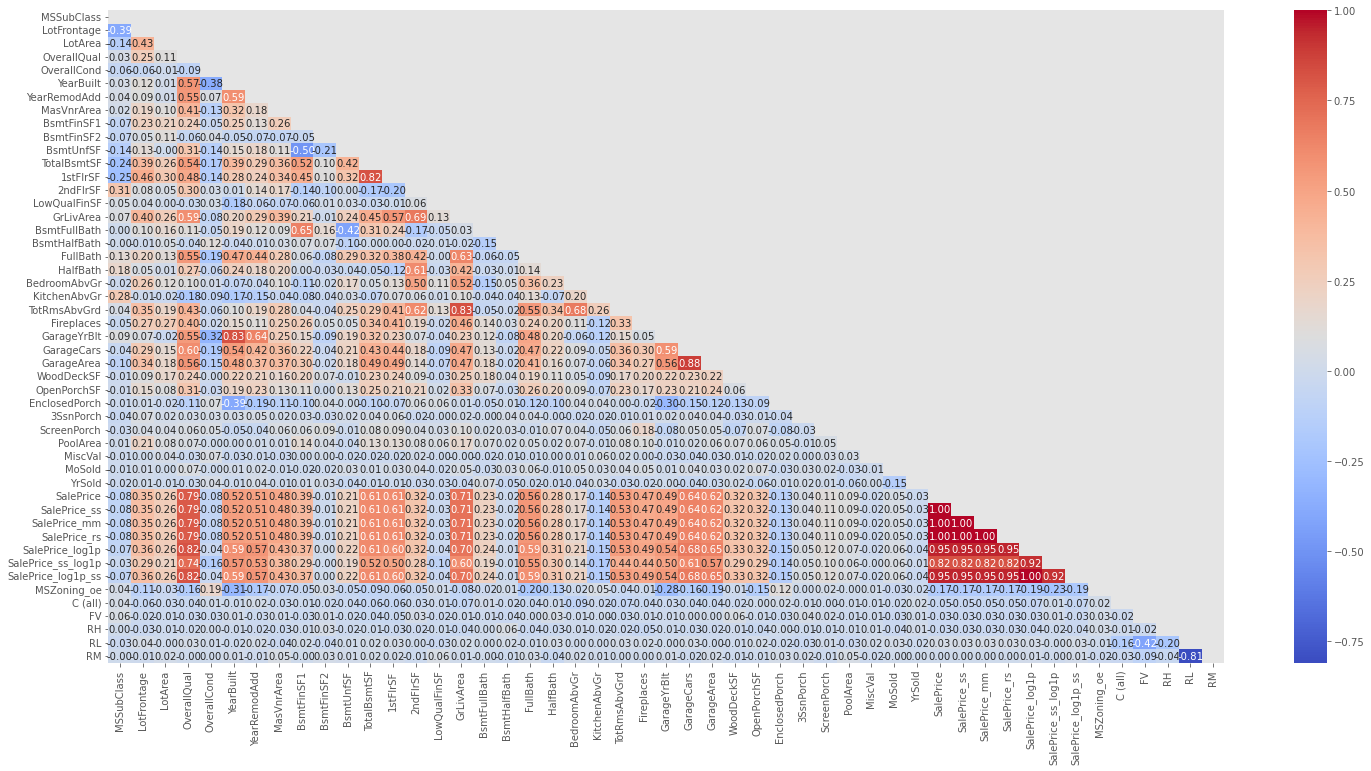

In [69]:
# heatmap
plt.figure(figsize = (25,12))
sns.heatmap(data = corr, annot = True, cmap = 'coolwarm', fmt = '.2f', mask = mask)

In [62]:
# "YearBuilt", "GarageYrBlt"]


### 트리 기반 모델의 Feature Importance

In [70]:
df_num = train.select_dtypes(include='number').dropna()
df_num.isnull().sum().sum() # 결측치 하나도 없는지 확인

0

In [71]:
df_num.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'SalePrice_ss', 'SalePrice_mm',
       'SalePrice_rs', 'SalePrice_log1p', 'SalePrice_ss_log1p',
       'SalePrice_log1p_ss', 'MSZoning_oe', 'C (all)', 'FV', 'RH', 'RL', 'RM'],
      dtype='object')

In [72]:
X = df_num[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'MSZoning_oe', 'C (all)', 'FV', 'RH', 'RL', 'RM']]
y = df_num['SalePrice_log1p']

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42)

In [75]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state = 42)
model

RandomForestRegressor(random_state=42)

In [76]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

<AxesSubplot:ylabel='fn'>

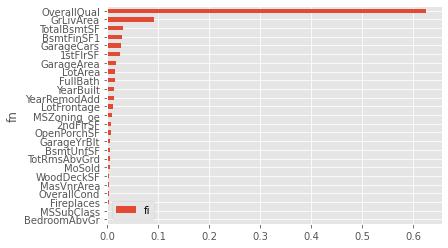

In [77]:
df_if = pd.DataFrame({'fi' : model.feature_importances_, 'fn': model.feature_names_in_})
df_if.sort_values('fi').set_index('fn').tail(25).plot.barh()